# 一、数据获取

## 1.1我爱我家爬虫
- 利用python以及lxml、requests、xpath等解析库，从我爱我家网站上爬取了2020年6月以前杭州市主城五区普通住宅的所有成交数据

## 1.2百度API获取地理信息
- 利用百度地图API获取基础设施及地标经纬度坐标，并通过地名反向检索功能，获取每个小区的坐标

## 1.3Arcgis上图匹配距离
- 通过Arcgis实现数据上图，并完成初步小区和基础设施、地标的距离计算

# 二、数据清洗
- 查看数据，对缺失值和异常值进行处理，并对字段进行数值化处理，通过可视化图表对数据进行描述行分析

## 2.1格式处理

In [2]:
import pandas as pd

In [3]:
# 读取成交数据，查看数据基本信息
df0 = pd.read_csv('/Users/lyk/Desktop/try/sellinfo.csv')
print(df0.info()) # 由于数据尚未处理和转化，不使用describe()
df0.T.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19334 entries, 0 to 19333
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   小区名     19334 non-null  object 
 1   经度      19334 non-null  float64
 2   纬度      19334 non-null  float64
 3   成交日期    19334 non-null  object 
 4   成交年份    19334 non-null  int64  
 5   成交总价    19334 non-null  int64  
 6   成交单价    19334 non-null  int64  
 7   挂牌价     19334 non-null  int64  
 8   成交周期    19258 non-null  float64
 9   户型      19334 non-null  object 
 10  房间数     19334 non-null  object 
 11  厅数      19334 non-null  object 
 12  面积      19334 non-null  object 
 13  朝向      19334 non-null  object 
 14  装修      19334 non-null  object 
 15  城区      19334 non-null  object 
 16  所在楼层    19334 non-null  object 
 17  建筑年代    19083 non-null  float64
 18  地铁距离    19334 non-null  float64
 19  公园距离    19334 non-null  float64
 20  购物中心距离  19334 non-null  float64
 21  市民中心距离  19334 non-null  float64
 22

0           1           2           3           4           5      \
小区名         景芳东区      蚕花园永宁坊       超级星期天       大关东三苑       大关南六苑       大关东三苑   
经度    120.210255  120.142991  120.131044  120.152119  120.155198  120.152119   
纬度     30.270965   30.331321    30.18103   30.307461   30.304494   30.307461   
成交日期  2016.06.18  2016.06.18  2016.05.11  2016.02.01  2016.03.15  2016.02.23   
成交年份        2016        2016        2016        2016        2016        2016   

           6           7           8           9      ...       19324  \
小区名         云河大厦       超级星期天        易构大厦         和睦院  ...      绿城明月江南   
经度    120.142539  120.131044  120.117768  120.122285  ...  120.222808   
纬度     30.292752    30.18103   30.328095   30.309537  ...   30.209491   
成交日期  2017.02.13  2016.08.10  2019.12.30  2017.10.26  ...  2017.11.10   
成交年份        2017        2016        2019        2017  ...        2017   

           19325       19326       19327       19328       19329       19330  \
小区名         寰宇天下      融信杭州公馆     西溪诚园守纯苑        水岸帝景      金都城市芯宇      绿地华家池印   
经度    120.211227  120.126162  120.074554  120.220018   120.13198  120.193089   
纬度     30.220815   30.294725    30.29149   30.258204   30.293303    30.27638   
成交日期  2017.07.17  2019.07.29  2020.04.23  2020.03.31  2019.07.21  2019.09.26   
成交年份        2017        2019        2020        2020        2019        2019   

           19331       19332       19333  
小区名       绿城明月江南    星洲花园白沙佛庭       绿城留香园  
经度    120.222808  120.090896  120.225721  
纬度     30.209491   30.291043   30.274486  
成交日期  2018.08.08  2019.12.19  2019.09.12  
成交年份        2018        2019        2019  

[5 rows x 19334 columns]

In [4]:
#复制一份新表用于后续的数据处理
df1 = df0.copy()

# 总价单位统一为万
df1.成交总价 = df1.成交总价/ 10000
df1.挂牌价 = df1.挂牌价/ 10000

#成交周期统一为月
df1.成交周期 = df1.成交周期/ 31

# 字段取数值部分
df1.房间数 =  df1.房间数.str.replace('室', '')
df1.厅数 = df1.厅数.str.replace('厅', '')
df1.面积 = df1.面积.str.replace('㎡', '')

# 转化时间序列
df1['成交日期'] = pd.to_datetime(df1['成交日期'])
pd.to_datetime(df1['成交日期'])

# 将合适的对象数据转为数值
df1["房间数"] = pd.to_numeric(df1["房间数"],errors='coerce')
df1["厅数"] = pd.to_numeric(df1["厅数"],errors='coerce')
df1["面积"] = pd.to_numeric(df1["面积"],errors='coerce')

print(df1.info()) # 由于数据尚未处理和转化，不使用describe()
df1.T.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19334 entries, 0 to 19333
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   小区名     19334 non-null  object        
 1   经度      19334 non-null  float64       
 2   纬度      19334 non-null  float64       
 3   成交日期    19334 non-null  datetime64[ns]
 4   成交年份    19334 non-null  int64         
 5   成交总价    19334 non-null  float64       
 6   成交单价    19334 non-null  int64         
 7   挂牌价     19334 non-null  float64       
 8   成交周期    19258 non-null  float64       
 9   户型      19334 non-null  object        
 10  房间数     19334 non-null  int64         
 11  厅数      19334 non-null  int64         
 12  面积      19334 non-null  float64       
 13  朝向      19334 non-null  object        
 14  装修      19334 non-null  object        
 15  城区      19334 non-null  object        
 16  所在楼层    19334 non-null  object        
 17  建筑年代    19083 non-null  float64       
 18  地铁距离  

0                    1                    2      \
小区名                  景芳东区               蚕花园永宁坊                超级星期天   
经度             120.210255           120.142991           120.131044   
纬度              30.270965            30.331321             30.18103   
成交日期  2016-06-18 00:00:00  2016-06-18 00:00:00  2016-05-11 00:00:00   
成交年份                 2016                 2016                 2016   

                    3                    4                    5      \
小区名                 大关东三苑                大关南六苑                大关东三苑   
经度             120.152119           120.155198           120.152119   
纬度              30.307461            30.304494            30.307461   
成交日期  2016-02-01 00:00:00  2016-03-15 00:00:00  2016-02-23 00:00:00   
成交年份                 2016                 2016                 2016   

                    6                    7                    8      \
小区名                  云河大厦                超级星期天                 易构大厦   
经度             120.142539           120.131044           120.117768   
纬度              30.292752             30.18103            30.328095   
成交日期  2017-02-13 00:00:00  2016-08-10 00:00:00  2019-12-30 00:00:00   
成交年份                 2017                 2016                 2019   

                    9      ...                19324                19325  \
小区名                   和睦院  ...               绿城明月江南                 寰宇天下   
经度             120.122285  ...           120.222808           120.211227   
纬度              30.309537  ...            30.209491            30.220815   
成交日期  2017-10-26 00:00:00  ...  2017-11-10 00:00:00  2017-07-17 00:00:00   
成交年份                 2017  ...                 2017                 2017   

                    19326                19327                19328  \
小区名                融信杭州公馆              西溪诚园守纯苑                 水岸帝景   
经度             120.126162           120.074554           120.220018   
纬度              30.294725             30.29149            30.258204   
成交日期  2019-07-29 00:00:00  2020-04-23 00:00:00  2020-03-31 00:00:00   
成交年份                 2019                 2020                 2020   

                    19329                19330                19331  \
小区名                金都城市芯宇               绿地华家池印               绿城明月江南   
经度              120.13198           120.193089           120.222808   
纬度              30.293303             30.27638            30.209491   
成交日期  2019-07-21 00:00:00  2019-09-26 00:00:00  2018-08-08 00:00:00   
成交年份                 2019                 2019                 2018   

                    19332                19333  
小区名              星洲花园白沙佛庭                绿城留香园  
经度             120.090896           120.225721  
纬度              30.291043            30.274486  
成交日期  2019-12-19 00:00:00  2019-09-12 00:00:00  
成交年份                 2019                 2019  

[5 rows x 19334 columns]

## 2.2缺失值处理

In [5]:
# 缺失值查看及处理
df1. isnull() .sum() #表格形式

小区名         0
经度          0
纬度          0
成交日期        0
成交年份        0
成交总价        0
成交单价        0
挂牌价         0
成交周期       76
户型          0
房间数         0
厅数          0
面积          0
朝向          0
装修          0
城区          0
所在楼层        0
建筑年代      251
地铁距离        0
公园距离        0
购物中心距离      0
市民中心距离      0
西湖距离        0
学区          0
学区质量        0
dtype: int64

In [6]:
# 用中位数对缺失值进行填补
df1['成交周期'] = df1['成交周期']. fillna(df1['成交周期']. median())
df1['建筑年代'] = df1['建筑年代']. fillna(df1['建筑年代']. median())
#再次查看缺失值表格，核对操作是否成功
df1. isnull() .sum() #表格形式

小区名       0
经度        0
纬度        0
成交日期      0
成交年份      0
成交总价      0
成交单价      0
挂牌价       0
成交周期      0
户型        0
房间数       0
厅数        0
面积        0
朝向        0
装修        0
城区        0
所在楼层      0
建筑年代      0
地铁距离      0
公园距离      0
购物中心距离    0
市民中心距离    0
西湖距离      0
学区        0
学区质量      0
dtype: int64

## 2.3异常值处理

In [7]:
#查看数据的描述性统计，看是否有明显异常值
df1. describe()

经度            纬度          成交年份          成交总价          成交单价  \
count  19334.000000  19334.000000  19334.000000  19334.000000  19334.000000   
mean     120.156201     30.283780   2017.821506    287.931002  34380.888021   
std        0.048925      0.043851      1.380698    149.870047  11874.183484   
min      120.048050     30.161860   2016.000000     45.000000  10219.000000   
25%      120.118742     30.265836   2017.000000    170.000000  25428.250000   
50%      120.155135     30.289105   2018.000000    260.000000  33599.500000   
75%      120.191654     30.310453   2019.000000    362.000000  41484.000000   
max      120.282195     30.375278   2020.000000    955.000000  91557.000000   

                挂牌价          成交周期           房间数            厅数            面积  \
count  19334.000000  19334.000000  19334.000000  19334.000000  19334.000000   
mean     308.559755      3.135503      2.386056      1.483345     84.274908   
std      164.508780      3.429506      0.764470      0.548489     33.134790   
min       56.000000      0.032258      1.000000      0.000000     25.000000   
25%      180.000000      0.741935      2.000000      1.000000     59.212500   
50%      279.000000      1.903226      2.000000      2.000000     84.325000   
75%      390.000000      4.354839      3.000000      2.000000     94.047500   
max     1360.000000     26.774194      4.000000      3.000000    301.000000   

               建筑年代          地铁距离          公园距离        购物中心距离        市民中心距离  \
count  19334.000000  19334.000000  19334.000000  19334.000000  19334.000000   
mean    2003.133547      1.147687      0.572098      1.081424      8.322446   
std        8.814042      1.233155      0.366747      0.710812      3.786004   
min     1969.000000      0.040000      0.000000      0.010000      0.550000   
25%     1997.000000      0.490000      0.300000      0.600000      5.160000   
50%     2004.000000      0.760000      0.490000      0.970000      8.640000   
75%     2010.000000      1.190000      0.750000      1.350000     11.020000   
max     2019.000000      6.330000      2.160000      5.840000     17.440000   

               西湖距离          学区质量  
count  19334.000000  19334.000000  
mean       5.660122      1.508327  
std        3.161763      0.775343  
min        0.120000      1.000000  
25%        3.270000      1.000000  
50%        4.920000      1.000000  
75%        7.370000      2.000000  
max       14.630000      3.000000

- 从描述性统计结果上看未见明显异常，根据研究目的要求可以采取更为精细的异常值界定方法，此处不展开，详细见第四节模型中异常值处理

# 三、数据分析

## 2.1市场基本面——杭州二手房市场有没有看头？

1.房源分布、成交价格及周期散点图（可加年份维度）

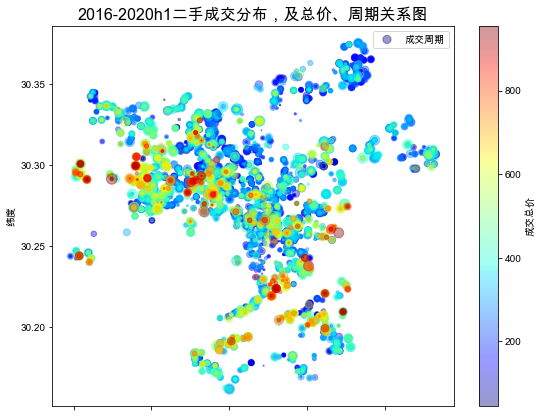

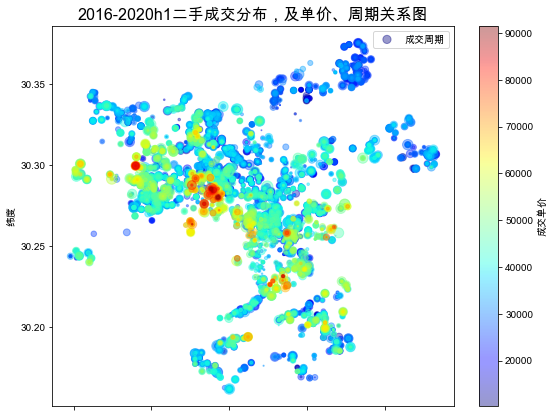

In [8]:
#数据整体房源分布、成交价格及周期散点图
import matplotlib.pyplot as plt
import matplotlib.colors as col
import seaborn as sns
plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#总价维度
df1.plot(kind = 'scatter', x = '经度', y = '纬度', alpha = 0.4,
         s = df1['成交周期'] * 5, label = '成交周期', figsize = (9,7),
         c = '成交总价', cmap = plt.get_cmap("jet"), colorbar = True)
plt.title('2016-2020h1二手成交分布，及总价、周期关系图', size = 16)
plt.legend()
#单价维度
df1b = df1.sort_values(by="成交单价" , ascending=True)
df1b.plot(kind = 'scatter', x = '经度', y = '纬度', alpha = 0.4,
         s = df1b['成交周期'] * 5, label = '成交周期', figsize = (9,7),
         c = '成交单价', cmap = plt.get_cmap("jet"), colorbar = True)
plt.title('2016-2020h1二手成交分布，及单价、周期关系图', size = 16)
plt.legend()


- 上城区、西湖区、滨江区为二手房价格高地，均价水平高，三区基本囊括了主城区内所有高总价（800w以上）成交房源

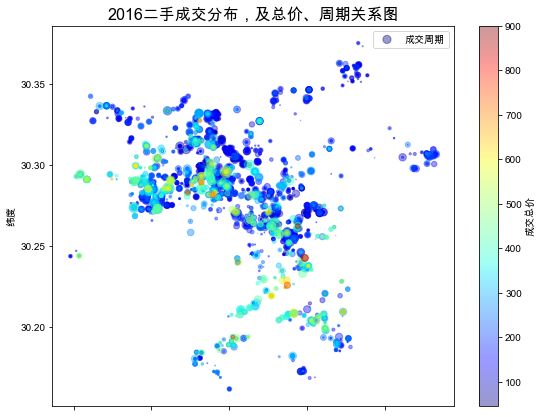

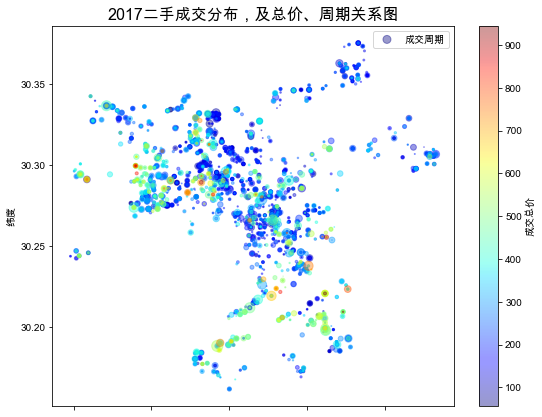

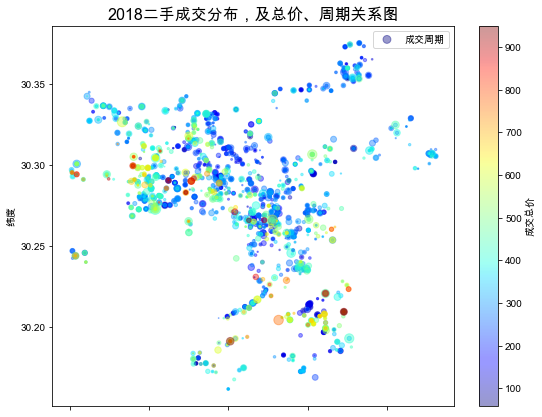

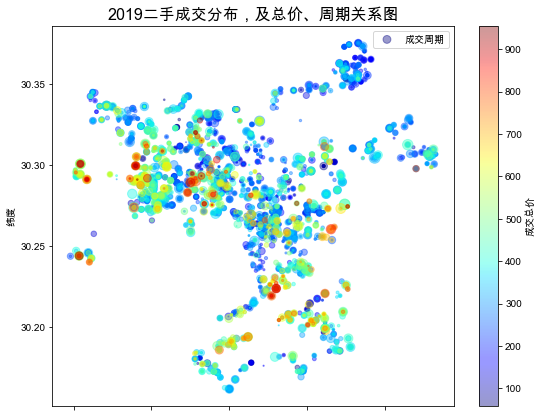

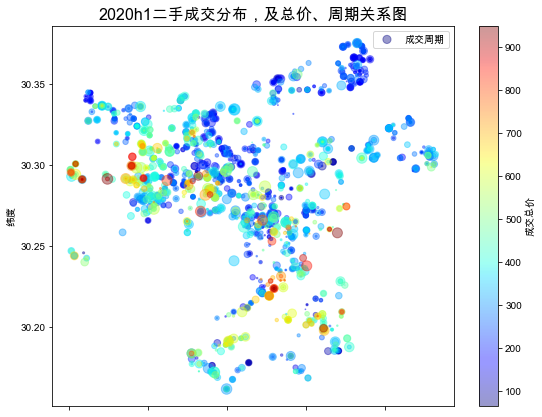

In [9]:
#还可以进行分年度层面的分析：如分年度数据房源分布、成交价格及周期散点图
df2016 = df1[(df1.成交日期>='20160101')&(df1.成交日期<='20161231')]   
df2017 = df1[(df1.成交日期>='20170101')&(df1.成交日期<='20171231')]     
df2018 = df1[(df1.成交日期>='20180101')&(df1.成交日期<='20181231')]     
df2019 = df1[(df1.成交日期>='20190101')&(df1.成交日期<='20191231')] 
df2020h1 = df1[(df1.成交日期>='20200101')&(df1.成交日期<='20200630')]    
df2016.plot(kind = 'scatter', x = '经度', y = '纬度', alpha = 0.4,
         s = df2016['成交周期'] * 5, label = '成交周期', figsize = (9,7),
         c = '成交总价', cmap = plt.get_cmap("jet"), colorbar = True)
plt.title('2016二手成交分布，及总价、周期关系图', size = 16)
plt.legend()

df2017.plot(kind = 'scatter', x = '经度', y = '纬度', alpha = 0.4,
         s = df2017['成交周期'] * 5, label = '成交周期', figsize = (9,7),
         c = '成交总价', cmap = plt.get_cmap("jet"), colorbar = True)
plt.title('2017二手成交分布，及总价、周期关系图', size = 16)
plt.legend()

df2018.plot(kind = 'scatter', x = '经度', y = '纬度', alpha = 0.4,
         s = df2018['成交周期'] * 5, label = '成交周期', figsize = (9,7),
         c = '成交总价', cmap = plt.get_cmap("jet"), colorbar = True)
plt.title('2018二手成交分布，及总价、周期关系图', size = 16)
plt.legend()

df2019.plot(kind = 'scatter', x = '经度', y = '纬度', alpha = 0.4,
         s = df2019['成交周期'] * 5, label = '成交周期', figsize = (9,7),
         c = '成交总价', cmap = plt.get_cmap("jet"), colorbar = True)
plt.title('2019二手成交分布，及总价、周期关系图', size = 16)
plt.legend()

df2020h1.plot(kind = 'scatter', x = '经度', y = '纬度', alpha = 0.4,
         s = df2020h1['成交周期'] * 5, label = '成交周期', figsize = (9,7),
         c = '成交总价', cmap = plt.get_cmap("jet"), colorbar = True)
plt.title('2020h1二手成交分布，及总价、周期关系图', size = 16)
plt.legend()


- 2016年起二手房市场起势，成交周期缩短，热度两极分化，热点区域量价迅速爬升，2020年上半年受疫情黑天鹅影响，成交周期拉长，价格略微波动

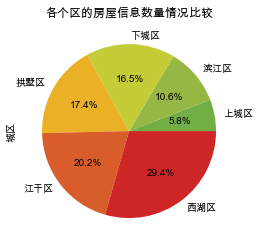

西湖区    5693
江干区    3902
拱墅区    3359
下城区    3193
滨江区    2056
上城区    1131
Name: 城区, dtype: int64


In [10]:
#各区成交量饼图
colors = ['#71ae46','#96b744','#c4cc38','#eab026','#d85d2a','#ce2626']
df1.城区.value_counts().sort_values().plot(kind='pie',autopct="%1.1f%%",colors=colors)
plt.title('各个区的房屋信息数量情况比较')
plt.show()
print(df1.城区.value_counts().sort_values(ascending=False))

- 西湖区-“量价齐高”、滨江区、上城区-“价高量少”、拱墅区、江干区、下城区-“量中价中”

2.各城区成交量价

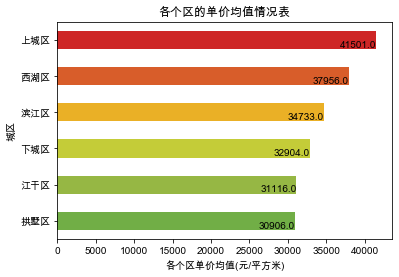

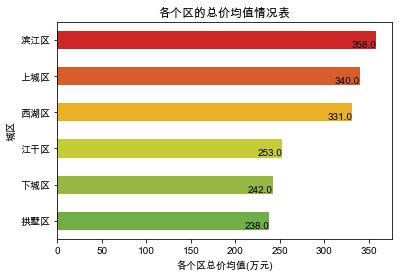

In [11]:
#各区单价、总价均值比较
colors = ['#71ae46','#96b744','#c4cc38','#eab026','#d85d2a','#ce2626']
df1.成交单价.groupby(df1.城区).mean().sort_values().plot(kind='barh',color=colors)
plt.xlabel('各个区单价均值(元/平方米)')
plt.ylabel('城区')
plt.title('各个区的单价均值情况表')

A = df1.成交单价.groupby(df1.城区).mean().sort_values()
for i in range(len(list(df1.城区.value_counts()))): # 为图表加数字标签
    plt.text(A[i],i,round(A[i],0),fontsize=10,verticalalignment="top",horizontalalignment="right")  # round(A[i],4)保留四位小数
plt.show()

colors = ['#71ae46','#96b744','#c4cc38','#eab026','#d85d2a','#ce2626']
df1.成交总价.groupby(df1.城区).mean().sort_values().plot(kind='barh',color=colors)
plt.xlabel('各个区总价均值(万元)')
plt.ylabel('城区')
plt.title('各个区的总价均值情况表')

A = df1.成交总价.groupby(df1.城区).mean().sort_values()
for i in range(len(list(df1.城区.value_counts()))): # 为图表加数字标签
    plt.text(A[i],i,round(A[i],0),fontsize=10,verticalalignment="top",horizontalalignment="right")  # round(A[i],4)保留四位小数
plt.show()

- 六区之间的梯队分化基本和前面所得结论一致，上城区和西湖区二手房中较多“老破小”，而滨江区大多次新房，故出现梯队内部，单价与总价排序不一致的现象

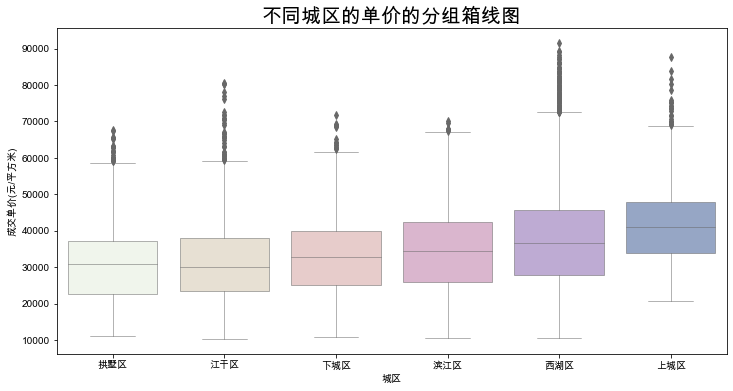

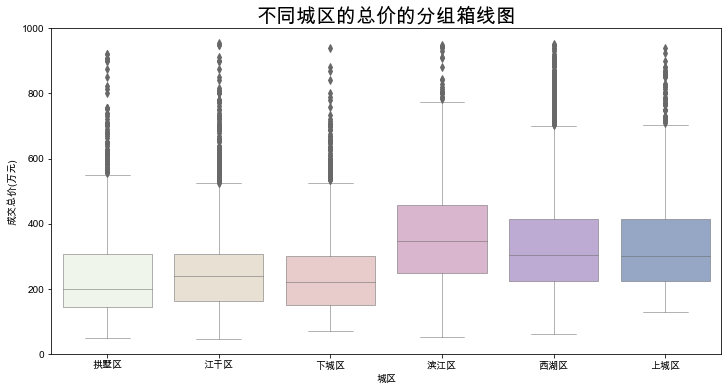

In [12]:
#各城区成交单价、总价箱型图
df1_temp1 = df1[['城区','成交单价']].sort_values(by=['城区'])
df1_temp1['城区'] = df1_temp1['城区'].astype('category')  # 标签排序
df1_temp1['城区'] = df1_temp1['城区'].cat.set_categories(['拱墅区','江干区','下城区','滨江区','西湖区','上城区'])
plt.figure(figsize=(12,6))  # 设置画布大小
sns.boxplot(x='城区',y='成交单价',data=df1_temp1,linewidth=0.5,palette=sns.cubehelix_palette(16,start=2, rot=2, dark=0, light=.95))
plt.ylabel('成交单价(元/平方米)')
plt.xlabel('城区')
plt.title('不同城区的单价的分组箱线图', size= 20)
plt.show()

df1_temp1 = df1[['城区','成交总价']].sort_values(by=['城区'])
df1_temp1['城区'] = df1_temp1['城区'].astype('category')  # 标签排序
df1_temp1['城区'] = df1_temp1['城区'].cat.set_categories(['拱墅区','江干区','下城区','滨江区','西湖区','上城区'])
plt.figure(figsize=(12,6))  # 设置画布大小
sns.boxplot(x='城区',y='成交总价',data=df1_temp1,linewidth=0.5,palette=sns.cubehelix_palette(16,start=2, rot=2, dark=0, light=.95))
plt.ylabel('成交总价(万元)')
plt.xlabel('城区')
plt.title('不同城区的总价的分组箱线图', size=20)
plt.show()

In [13]:
#附加成交日期热力图（例如2019全年时间段内每日成交热力）
import datetime,random
from pyecharts import options as opts
from pyecharts.charts import Calendar

begin = datetime.date(2019,1,1)
end = datetime.date(2019,12,31)
data = [[str(t)[:10],v] for t,v in df2019.成交日期.value_counts().sort_index().items()]

c = (
        Calendar(opts.InitOpts(width = '800px',height = '400px')) # width、height设置画布大小
        .add("", data, calendar_opts=opts.CalendarOpts(range_=['2019-01-01', '2019-12-31']))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Calendar-2019杭州二手房成交量"),
            visualmap_opts=opts.VisualMapOpts(
                max_=50,
                min_=0,
                orient="horizontal",
                is_piecewise=False,
                pos_top="220px",
                pos_left="50px",
        ),
    )
)
#生成html图表文件
c.render('/Users/lyk/Desktop/try/Calendar-2019杭州二手房成交量.html')
# 在notebook中显示图表
c.render_notebook() 

## 2.2房屋特征影响——什么样子房子是最热销的？
 
 （ps：选择近一年半数据分析，贴近当前市场情况，节选部分价值较大属性）

In [14]:
#框定数据范围
df2 = df1[(df1.成交日期>='20190101')&(df1.成交日期<='20200630')] 

1.建筑特征

Text(0.5, 1.0, '成交房源建筑面积分布密度图')

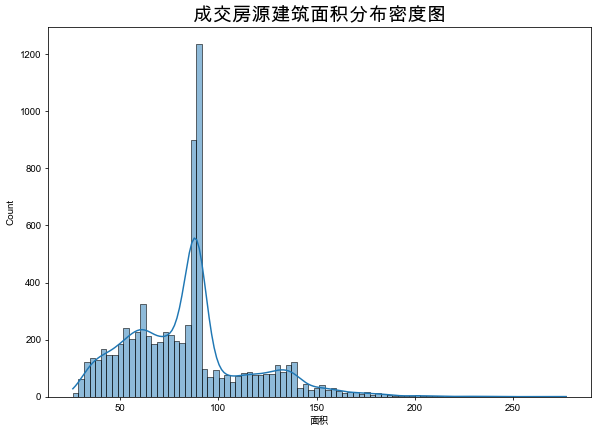

In [15]:
#面积kde图
plt.figure(dpi=70, figsize=(10, 7))
sns.histplot(df2.面积, kde = True, label='2019-2020h1')
plt.title('成交房源建筑面积分布密度图',size=20)

小户型比较好卖，市场中的换手率较高，89方是二手房市场中最紧俏的产品

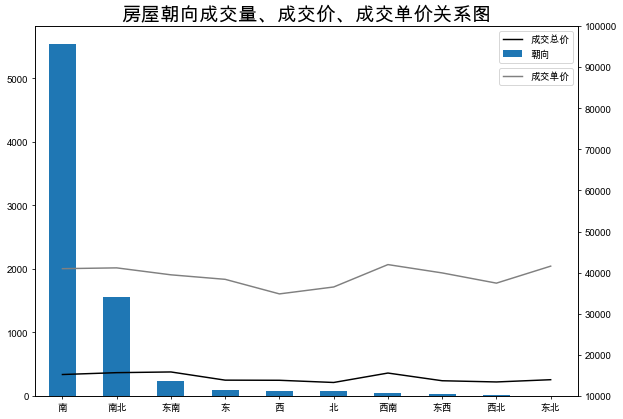

In [16]:
#房屋朝向情况
plt.figure(figsize=(10,7),dpi=70)
plt.title('房屋朝向成交量、成交价、成交单价关系图',size=20)
df2.朝向.value_counts()[:10].plot(kind='bar')
df2.groupby('朝向').成交总价.mean()[df2.朝向\
    .value_counts()[:10].index].plot(kind='line',color='black',label='成交总价')
plt.tick_params(labelsize=10)
plt.legend(fontsize=10)


plt.twinx()
plt.ylim((10000, 100000))
df2.groupby('朝向').成交单价.mean()[df2.朝向\
    .value_counts()[:10].index].plot(kind='line',color='gray',label='成交单价')
    
plt.legend(bbox_to_anchor=(1, 0.9),fontsize=10)
plt.tick_params(labelsize=10)

朝南或者南北通透的二手房是市场中最热销的

(array([0, 1, 2]), [Text(0, 0, '中楼层'), Text(1, 0, '高楼层'), Text(2, 0, '低楼层')])

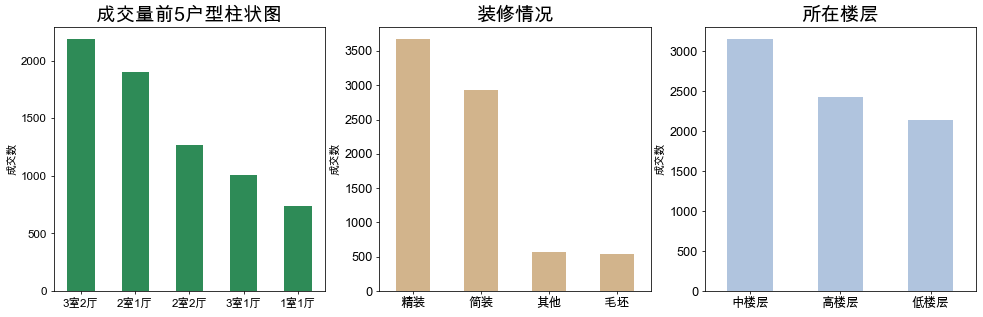

In [17]:
#户型、精装情况
plt.figure(figsize=(17,5),dpi=70)
plt.subplot(1,3,1)
plt.title('成交量前5户型柱状图',size=20)
plt.ylabel('成交数',size=11)
df2.户型.value_counts()[:5].plot(kind='bar',color='seagreen') # 成交数前5的户型
plt.tick_params(labelsize=12)
plt.xticks(rotation=0)

plt.subplot(1,3,2)
plt.title('装修情况',size=20)
plt.ylabel('成交数',size=11)
df2.装修.value_counts().plot(kind='bar',color='tan')
plt.tick_params(labelsize=13)
plt.xticks(rotation=0)

plt.subplot(1,3,3)
plt.title('所在楼层',size=20)
plt.ylabel('成交数',size=11)
df2.所在楼层.value_counts().plot(kind='bar',color='lightsteelblue')
plt.tick_params(labelsize=13)
plt.xticks(rotation=0)

- 3室2厅是市场中最主流的户型；成交房源基本是有装修，较少毛坯房；中间楼层最受客户青睐

1998.0    412
2000.0    491
2004.0    332
2009.0    416
2010.0    402
2012.0    334
2014.0    365
2015.0    316
2016.0    457
2017.0    321
Name: 建筑年代, dtype: int64

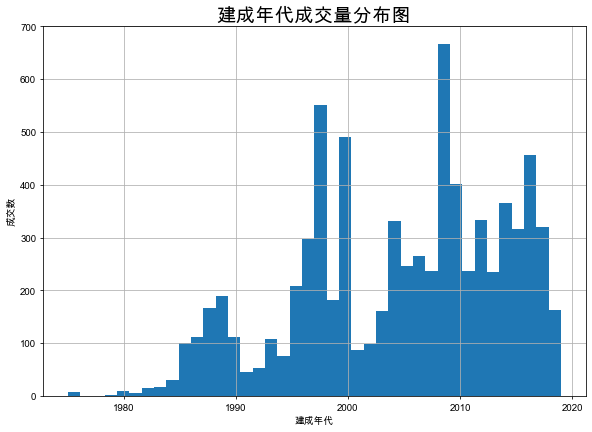

In [18]:
#建筑年代情况
plt.figure(figsize=(10,7),dpi=70)
plt.title('建成年代成交量分布图',size=20)
plt.xlabel('建成年代')
plt.ylabel('成交数')
df2.建筑年代.hist(bins=40)
df2.建筑年代.value_counts().iloc[:10].sort_index()

2000年左右的“老破小”和2010年以来的次新房是成交主力

2.邻里特征

<AxesSubplot:title={'center':'购物中心距离成交量分布图'}, xlabel='购物中心距离', ylabel='成交数'>

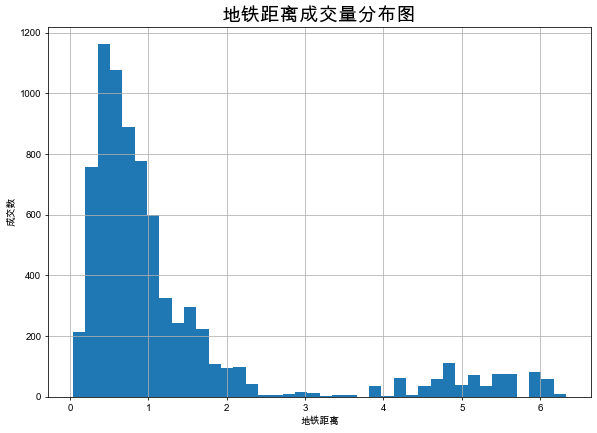

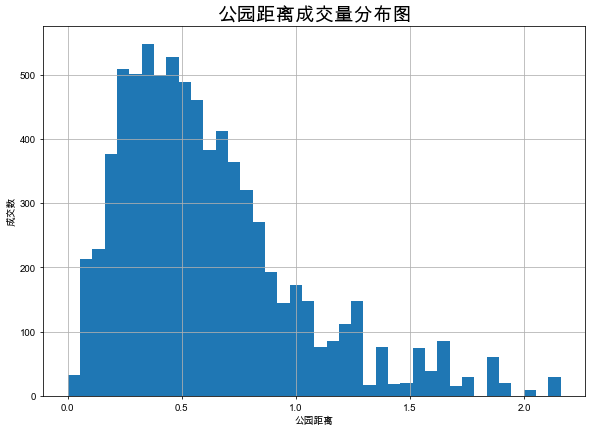

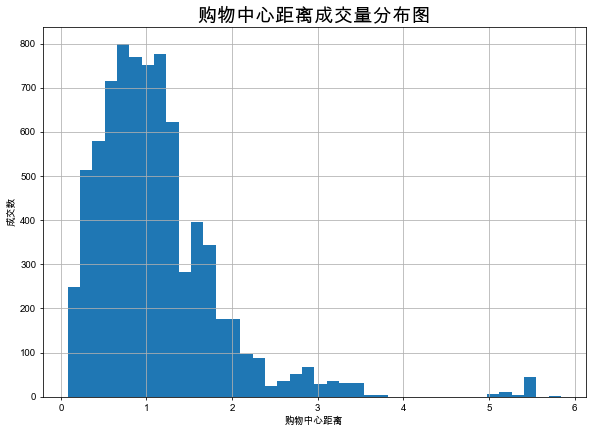

In [19]:
#地铁、公园、购物中心距离
plt.figure(figsize=(10,7),dpi=70)
plt.title('地铁距离成交量分布图',size=20)
plt.xlabel('地铁距离')
plt.ylabel('成交数')
df2.地铁距离.hist(bins=40)

plt.figure(figsize=(10,7),dpi=70)
plt.title('公园距离成交量分布图',size=20)
plt.xlabel('公园距离')
plt.ylabel('成交数')
df2.公园距离.hist(bins=40)

plt.figure(figsize=(10,7),dpi=70)
plt.title('购物中心距离成交量分布图',size=20)
plt.xlabel('购物中心距离')
plt.ylabel('成交数')
df2.购物中心距离.hist(bins=40)

主要成交房源分布在地铁2km以内，购物中心2km以内，公园1km以内，具备越好邻里特征的房屋，市场流通性越好，其中公园的距离阀值较购物中心和地铁更加敏感，可能是受到了不同类型设施可用性程度的影响

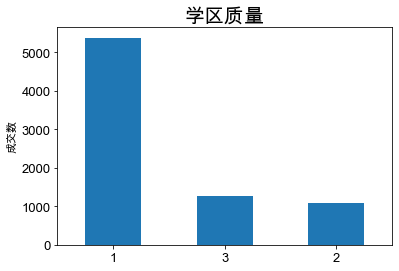

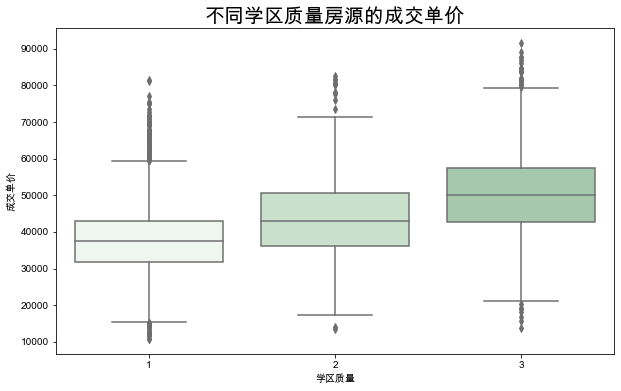

In [20]:
#特别地，杭州二手房市场是比较典型的学区房市场，数据集中额外加入了本人学术研究中设定的学区属性来进行分析
#学区质量：1，2，3；其中3表示最好一档的学区，如学军小学，求是小学等
plt.title('学区质量',size=20)
plt.ylabel('成交数',size=11)
df2.学区质量.value_counts().plot(kind='bar')
plt.tick_params(labelsize=13)
plt.xticks(rotation=0)

dfxq = df2[['学区质量','成交单价']]
plt.figure(figsize=(10,6))
sns.boxplot(x=dfxq['学区质量'],y=dfxq['成交单价'],palette=sns.cubehelix_palette(10,start=2, rot=0, dark=0, light=.95))
plt.title('不同学区质量房源的成交单价', size = 20)
plt.show()


从成交量角度上，学区房约占市场总量25%左右，但学区房的单价明显高于非学区房

3.区位特征

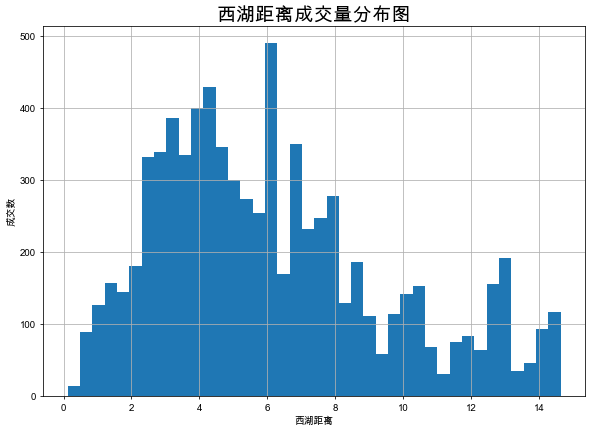

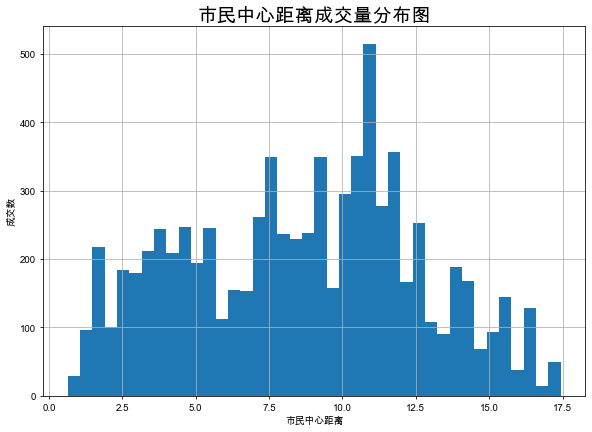

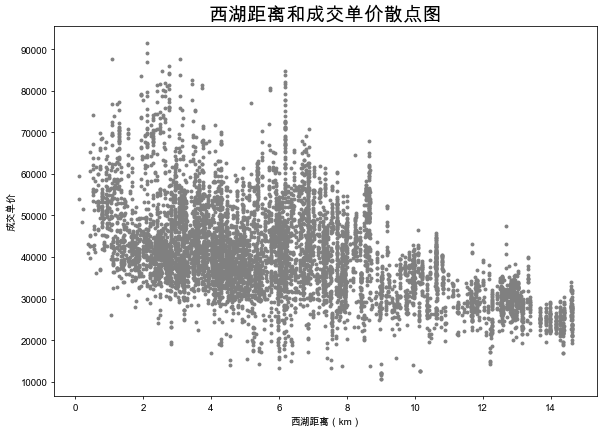

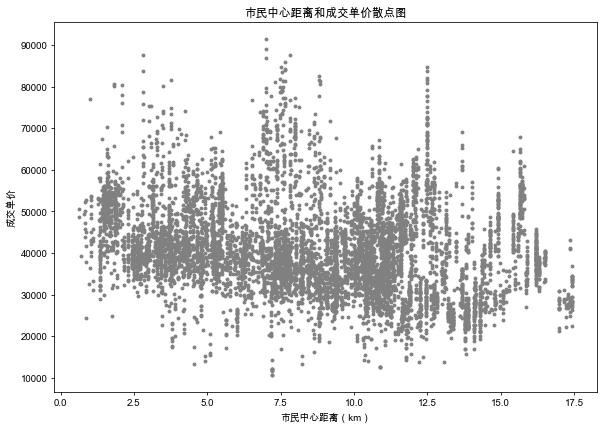

In [21]:
#西湖、市民中心距离

plt.figure(figsize=(10,7),dpi=70)
plt.title('西湖距离成交量分布图',size=20)
plt.xlabel('西湖距离')
plt.ylabel('成交数')
df2.西湖距离.hist(bins=40)

plt.figure(figsize=(10,7),dpi=70)
plt.title('市民中心距离成交量分布图',size=20)
plt.xlabel('市民中心距离')
plt.ylabel('成交数')
df2.市民中心距离.hist(bins=40)

plt.figure(figsize=(10,7),dpi=70)
dfxh = df2[['西湖距离','成交单价']]
plt.scatter(dfxh.西湖距离, dfxh.成交单价, marker='.',color='gray')
plt.title('西湖距离和成交单价散点图',size=20)
plt.ylabel("成交单价")
plt.xlabel("西湖距离（km）")
plt.show()

plt.figure(figsize=(10,7),dpi=70)
dfqj = df2[['市民中心距离','成交单价']]
plt.scatter(dfqj.市民中心距离, dfqj.成交单价, marker='.',color='gray')
plt.title('市民中心距离和成交单价散点图')
plt.ylabel("成交单价")
plt.xlabel("市民中心距离（km）")
plt.show()

从成交量角度上，西湖和钱江新城两个城市中心并为表现出明显的向心力，但价格上表现出了中心递减的趋势

## 2.3热点小区——市场中的明星楼盘？

In [22]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
words = [(v,n) for v,n in df2.小区名.value_counts().items()]


w = (
        WordCloud()
        # word_size_range最小值非负的话，低数值词组会填满形状外区域！
        .add("", words,shape='diamond',word_size_range=[-10, 40],word_gap=20) 
        .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-楼盘热度"))
)
# word_size_range=[20, 100],rotate_step=90,shape='diamond'  opts.InitOpts(width = '1000px',height = '1000px')
w.render('/Users/lyk/Desktop/try/wordcloud-热点楼盘.html')
w.render_notebook()

# 四、数据建模
- 仍然选用2019-2020h1作为样本范围

## 4.1数据预处理

1.原数据集字段选取

In [22]:
#主要保留第二节分析已证实存在影响分异的变量
df3 = df2.drop(['小区名','成交日期','成交单价','挂牌价','户型','城区','学区'],axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709 entries, 8 to 19333
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   经度      7709 non-null   float64
 1   纬度      7709 non-null   float64
 2   成交年份    7709 non-null   int64  
 3   成交总价    7709 non-null   float64
 4   成交周期    7709 non-null   float64
 5   房间数     7709 non-null   int64  
 6   厅数      7709 non-null   int64  
 7   面积      7709 non-null   float64
 8   朝向      7709 non-null   object 
 9   装修      7709 non-null   object 
 10  所在楼层    7709 non-null   object 
 11  建筑年代    7709 non-null   float64
 12  地铁距离    7709 non-null   float64
 13  公园距离    7709 non-null   float64
 14  购物中心距离  7709 non-null   float64
 15  市民中心距离  7709 non-null   float64
 16  西湖距离    7709 non-null   float64
 17  学区质量    7709 non-null   int64  
dtypes: float64(11), int64(4), object(3)
memory usage: 1.4+ MB


2.哑变量的获取

In [23]:
#朝向属性中值类型太多，会导致模型的多重共线性问题，此处取是否南朝向作为朝南虚拟变量值的判别依据，是为1，不是为0
df3['朝南'] = df3.朝向.apply(lambda x: 1 if x == '南' else 0)
#同样，根据第二节的初步分析结果，选择是否精装，是否中间楼层作为精装和中间楼层虚拟变量的判别依据，是为1，不是为0
df3['精装'] = df3.装修.apply(lambda x: 1 if x == '精装' else 0)
df3['中间楼层'] = df3.所在楼层.apply(lambda x: 1 if x == '中楼层' else 0)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709 entries, 8 to 19333
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   经度      7709 non-null   float64
 1   纬度      7709 non-null   float64
 2   成交年份    7709 non-null   int64  
 3   成交总价    7709 non-null   float64
 4   成交周期    7709 non-null   float64
 5   房间数     7709 non-null   int64  
 6   厅数      7709 non-null   int64  
 7   面积      7709 non-null   float64
 8   朝向      7709 non-null   object 
 9   装修      7709 non-null   object 
 10  所在楼层    7709 non-null   object 
 11  建筑年代    7709 non-null   float64
 12  地铁距离    7709 non-null   float64
 13  公园距离    7709 non-null   float64
 14  购物中心距离  7709 non-null   float64
 15  市民中心距离  7709 non-null   float64
 16  西湖距离    7709 non-null   float64
 17  学区质量    7709 non-null   int64  
 18  朝南      7709 non-null   int64  
 19  精装      7709 non-null   int64  
 20  中间楼层    7709 non-null   int64  
dtypes: float64(11), int64(7), object(3)


3.异常值精确核查

【 成交总价 】上界异常值总数： 0
【 成交总价 】下界异常值总数： 0
- - - - - - 
【 面积 】上界异常值总数： 77
【 面积 】下界异常值总数： 0
- - - - - - 
【 建筑年代 】上界异常值总数： 0
【 建筑年代 】下界异常值总数： 0
- - - - - - 
【 地铁距离 】上界异常值总数： 751
【 地铁距离 】下界异常值总数： 0
- - - - - - 
【 公园距离 】上界异常值总数： 29
【 公园距离 】下界异常值总数： 0
- - - - - - 
【 购物中心距离 】上界异常值总数： 74
【 购物中心距离 】下界异常值总数： 0
- - - - - - 
【 西湖距离 】上界异常值总数： 0
【 西湖距离 】下界异常值总数： 0
- - - - - - 
【 市民中心距离 】上界异常值总数： 0
【 市民中心距离 】下界异常值总数： 0
- - - - - - 


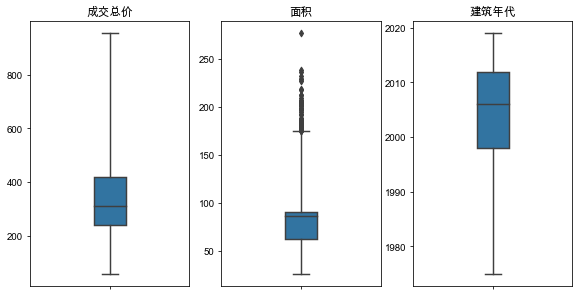

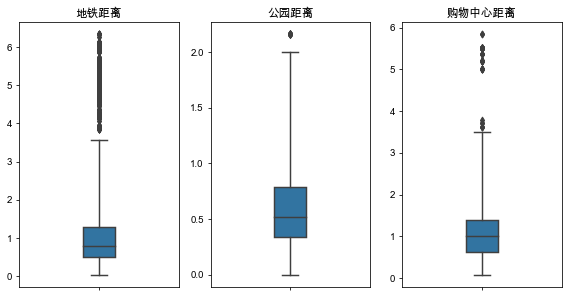

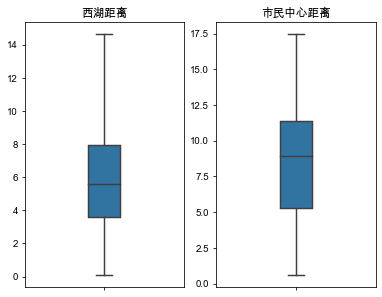

In [24]:
#第二节中仅通过描述性统计粗看方式，但在模型中对于数据要求情况更高，采用箱型图进行核查
# 查看一下最终会保留的连续值字段异常值情况，注意这里whis是3
def show_error(df3,col,whis=1.5,show=False):
        '''
        显示上下限异常值数量，可选显示示例异常数据
        df：数据源
        col：字段名
        whis：默认1.5，对应1.5倍iqr
        show：是否显示示例异常数据
        '''
        iqr = df3[col].quantile(0.75) - df3[col].quantile(0.25)
        upper_bound = df3[col].quantile(0.75) + whis * iqr # 上界
        lower_bound = df3[col].quantile(0.25) - whis * iqr # 下界
        # print(iqr,upper_bound,lower_bound)
        print('【',col,'】上界异常值总数：',df3[col][df3[col] > upper_bound].count())
        if show:
            print('异常值示例：\n',df3[df3[col] > upper_bound].head(5).T)
        print('【',col,'】下界异常值总数：',df3[col][df3[col] < lower_bound].count())
        if show:
            print('异常值示例：\n',df3[df3[col] < lower_bound].head(5).T)
        print('- - - - - - ')

plt.figure(figsize=(10,5), dpi=70)
for n,i in enumerate(['成交总价', '面积','建筑年代']):
    plt.subplot(1,3,n+1)
    plt.title(i)
    sns.boxplot(y = df3[i],width=0.2,whis=3)    
    plt.ylabel('')
for i in ['成交总价', '面积', '建筑年代']:        
    show_error(df3,i,whis=3)   

plt.figure(figsize=(10,5), dpi=70)
for n,i in enumerate(['地铁距离', '公园距离','购物中心距离']):
    plt.subplot(1,3,n+1)
    plt.title(i)
    sns.boxplot(y = df3[i],width=0.2,whis=3)    
    plt.ylabel('')
for i in ['地铁距离', '公园距离','购物中心距离']:        
    show_error(df3,i,whis=3)   
    
plt.figure(figsize=(10,5), dpi=70)
for n,i in enumerate(['西湖距离', '市民中心距离']):
    plt.subplot(1,3,n+1)
    plt.title(i)
    sns.boxplot(y = df3[i],width=0.2,whis=3)    
    plt.ylabel('')
for i in ['西湖距离', '市民中心距离']:        
    show_error(df3,i,whis=3)   

In [25]:
#异常值剔除
def drop_error(df3,col,whis=1.5):
        '''
        删除上下限异常值数量
        df：数据源
        col：字段名
        whis：默认1.5，对应1.5倍iqr
        '''
        iqr = df3[col].quantile(0.75) - df3[col].quantile(0.25)
        upper_bound = df3[col].quantile(0.75) + whis*iqr # 上界
        lower_bound = df3[col].quantile(0.25) - whis*iqr # 下界
        data_del = df3[col][(df3[col] > upper_bound) | (df3[col] < lower_bound)].count()
        data = df3[(df3[col] <= upper_bound) & (df3[col] >= lower_bound)]
        print(f'【{col}】总剔除数据量：',data_del)
        return data.reset_index(drop=True)

for i in ['成交总价', '面积','建筑年代', '地铁距离', '公园距离','购物中心距离', '西湖距离', '市民中心距离']:
    df3 = drop_error(df3,i,whis=3)    # 注意这里whis是3


【成交总价】总剔除数据量： 0
【面积】总剔除数据量： 77
【建筑年代】总剔除数据量： 0
【地铁距离】总剔除数据量： 746
【公园距离】总剔除数据量： 0
【购物中心距离】总剔除数据量： 5
【西湖距离】总剔除数据量： 0
【市民中心距离】总剔除数据量： 0


4.字段相关系数热力图

<AxesSubplot:>

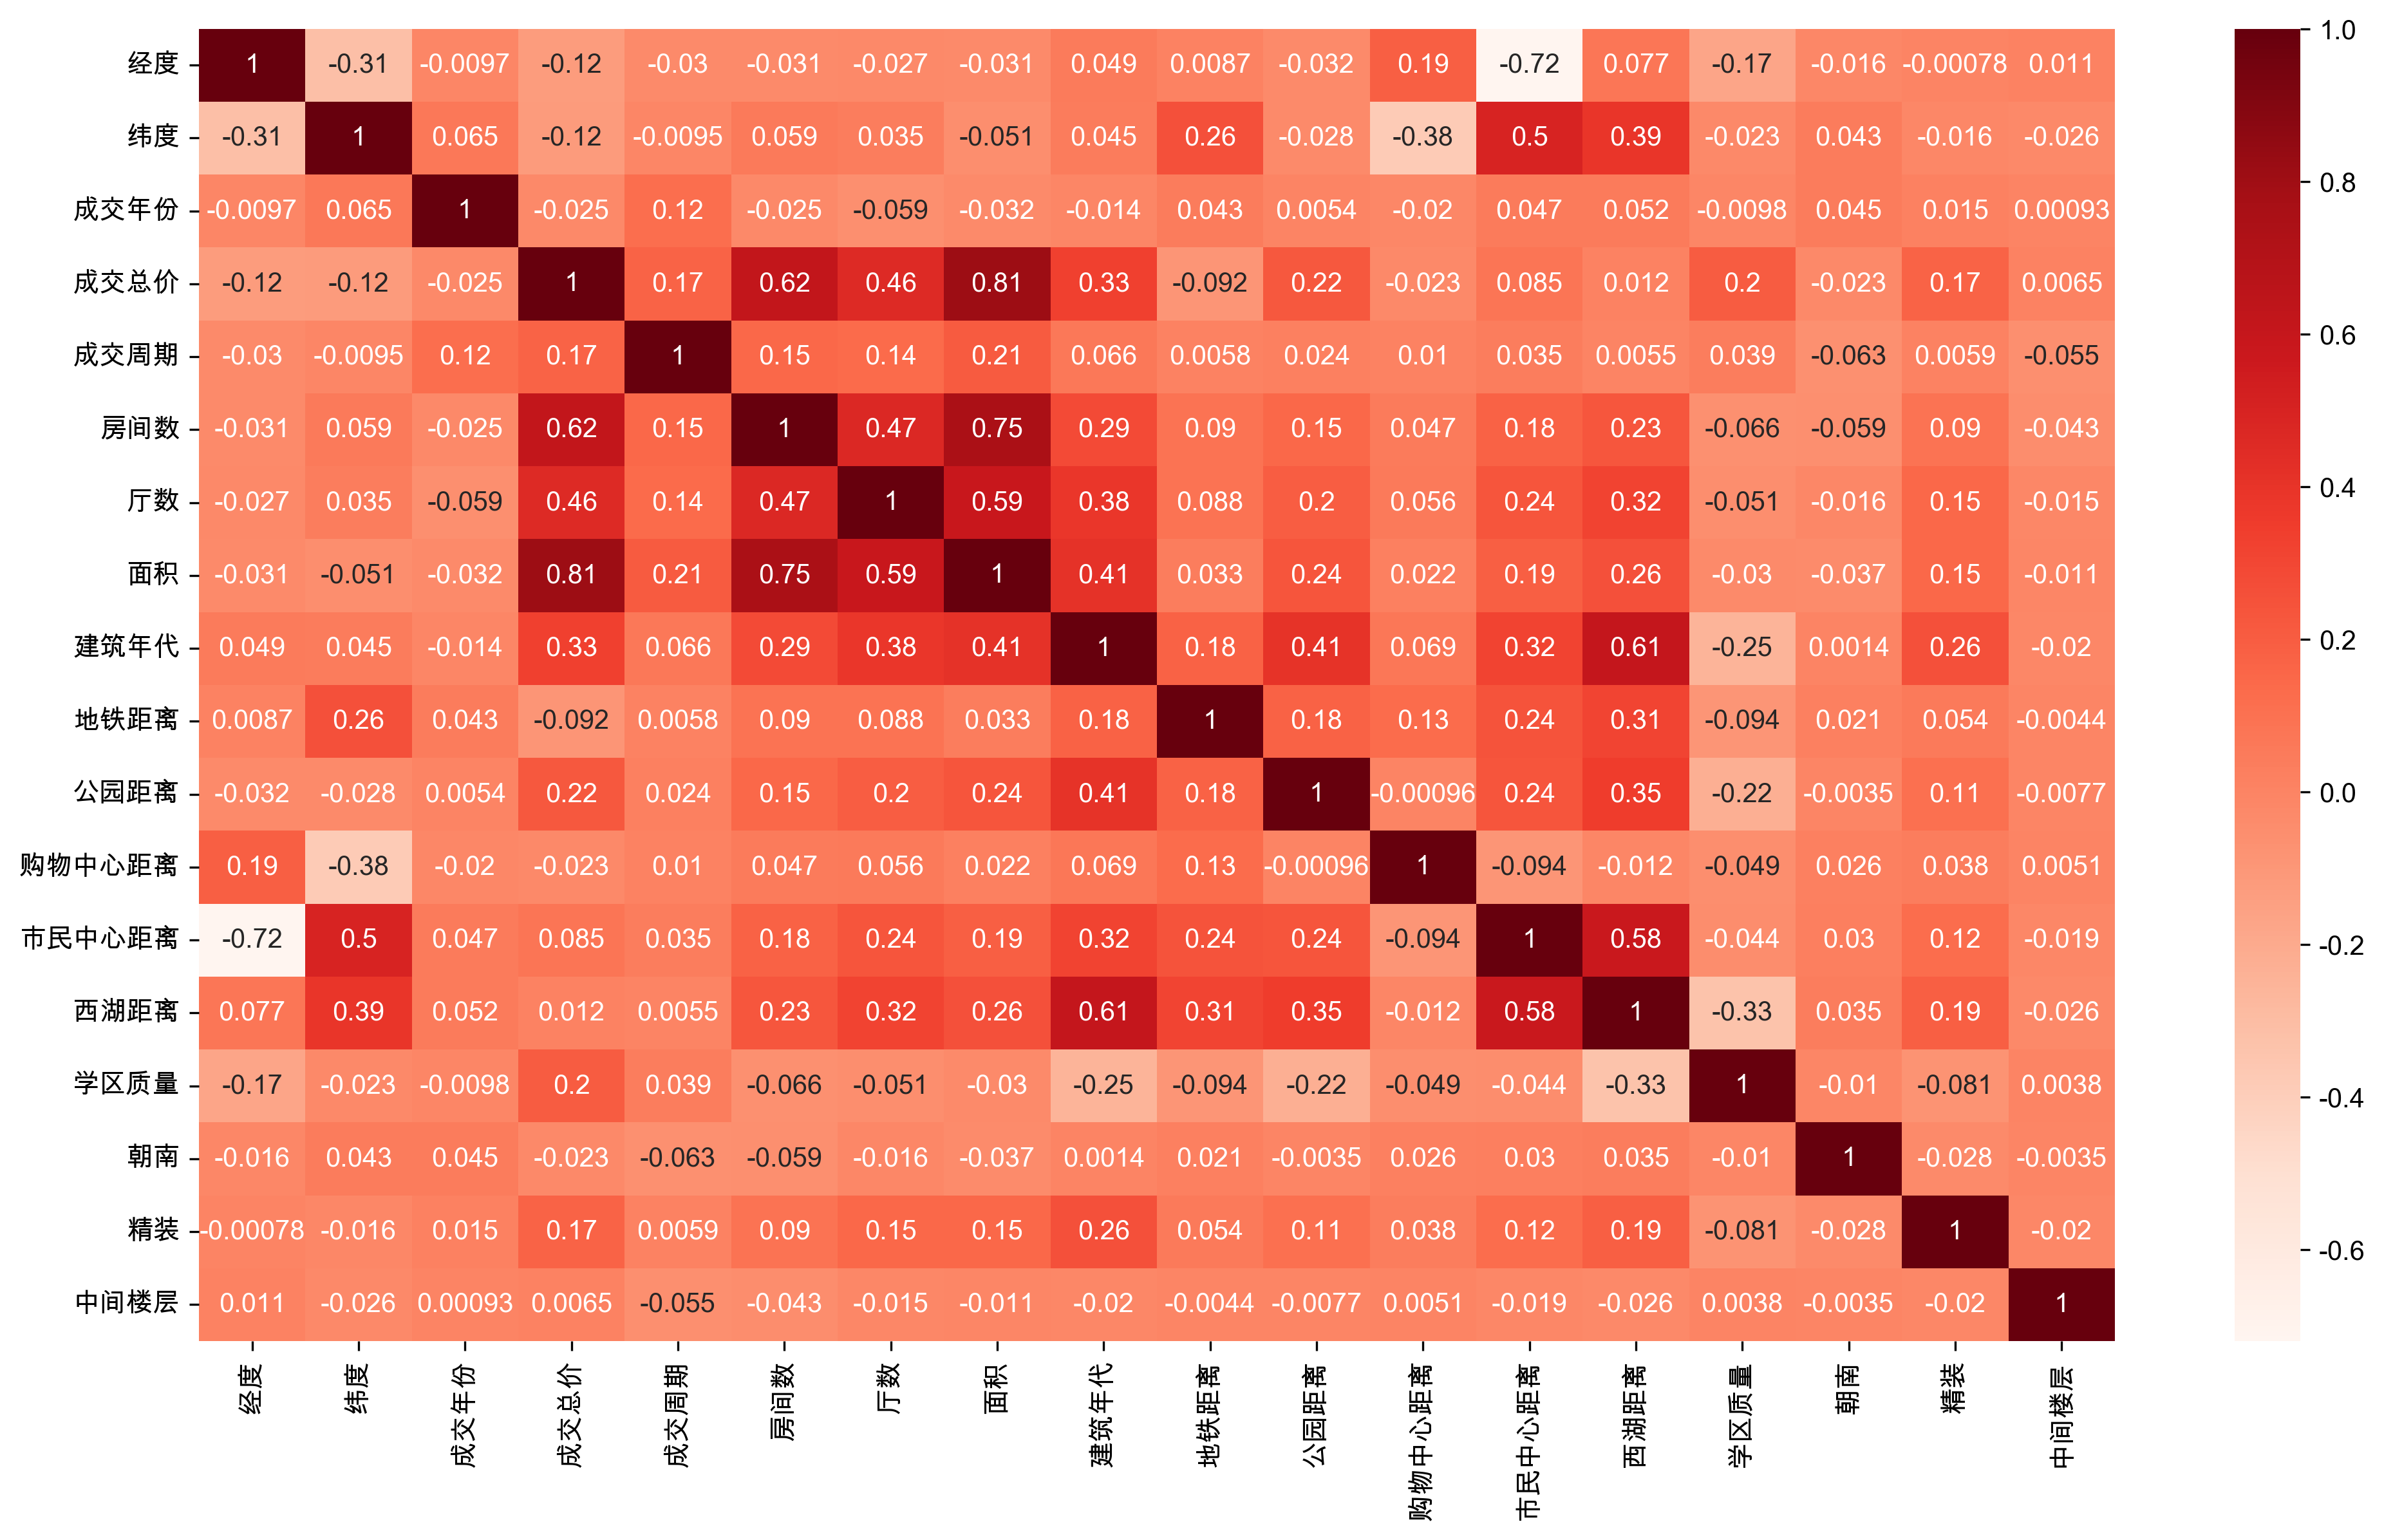

In [26]:
df4 = df3.drop(['朝向','装修', '所在楼层'], axis=1)
plt.figure(figsize=(16, 9),dpi=300)
corr = df4.corr()
sns.heatmap(corr,cmap='Reds',annot=True)

- 从相关系数热力图中可以大致发现，房间数、厅数、面积、建筑年代、公园距离、学区质量、精装是与成交总价相关度较高的几个特征，但由于房间数、厅数、和面积三者之间的相关度较高，考虑只保留面积属性

In [27]:
df5= df4.drop(['经度','纬度', '房间数','厅数'], axis=1)

## 4.2训练模型

1.数据准备

In [28]:
import numpy as np
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer,PolynomialFeatures
from sklearn.linear_model import LinearRegression,LassoCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, \
                            precision_score,recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
#训练集、测试集准备
X = df5.drop(['成交总价'],axis=1) 
y = df5['成交总价']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)    # random_state=42

# k折交叉拆分器 - 用于网格搜索
cv = KFold(n_splits=3,shuffle=True)

2.OLS线性回归

In [32]:
import statsmodels.api as sm
OLS_Model = sm.OLS(y,X).fit()
predictions_linear = OLS_Model.predict(X)
OLS_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   成交总价   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.378e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:31:22   Log-Likelihood:                         -39268.
No. Observations:                6881   AIC:                                  7.856e+04
Df Residuals:                    6868   BIC:                                  7.865e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
成交年份          -2.7223      0.131    -20.726      0.000      -2.980      -2.465
成交周期          -0.5327      0.224     -2.381      0.017      -0.971      -0.094
面积             4.0291      0.034    119.148      0.000       3.963       4.095
建筑年代           2.7512      0.133     20.612      0.000       2.490       3.013
地铁距离         -20.5812      1.832    -11.237      0.000     -24.172     -16.991
公园距离          38.4934      2.424     15.883      0.000      33.743      43.244
购物中心距离        -8.7052      1.406     -6.191      0.000     -11.462      -5.949
市民中心距离         0.9985      0.286      3.486      0.000       0.437       1.560
西湖距离         -14.3696      0.486    -29.584      0.000     -15.322     -13.417
学区质量          38.7051      1.229     31.481      0.000      36.295      41.115
朝南             6.9726      1.972      3.535      0.000       3.106      10.839
精装            21.5561      1.827     11.797      0.000      17.974      25.138
中间楼层           4.0114      1.788      2.243      0.025       0.506       7.517
==============================================================================
Omnibus:                      405.135   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.070
Skew:                           0.370   Prob(JB):                    1.21e-204
Kurtosis:                       4.652   Cond. No.                     7.92e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- OLS回归的拟和值很高，可能存在比较严重的过拟合和多重共线性问题

2.lasso回归

In [33]:
#Lasso回归：压缩变量，起降维作用；模处理
#Lasso回归等于线性回归 + L1范数（L1是拉普拉斯分布）
# 回归模型性能查看函数
def perfomance_reg(model,X,y,name=None):
    y_predict = model.predict(X)
    check = pd.DataFrame(y)
    check['y_predict'] = y_predict
    check['abs_err'] = abs(check['y_predict'] - check[y.name] )
    check['ape'] = check['abs_err'] / check[y.name]
    ape = check['ape'][check['ape']!=np.inf].mean()
    if name:
        print(name,':')
    print(f'mean squared error is: {mean_squared_error(y,y_predict)}')
    print(f'mean absolute error is: {mean_absolute_error(y,y_predict)}')
    print(f'R Squared is: {r2_score(y,y_predict)}')
    print(f'mean absolute percent error is: {ape}')
    print('- - - - - - ')

# 定义LassoCV（可自动通过Cross Validation搜索最佳正则系数alpha）
pipe_lassocv = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('sc',StandardScaler()),
    ('pwt',PowerTransformer()),
    ('lasso_regr',LassoCV(
        # 待搜索alpha值如下：
        # alphas=(list(np.arange(1,10)*0.1)+list(np.arange(1,10))+list(np.arange(1,11)*10))
        # alpha搜索完后发现0.1最合适
        alphas = (list(np.arange(1,10)*0.1)+list(np.arange(1,10))+list(np.arange(1,11)*10)),   
        cv=KFold(n_splits=3,shuffle=True),    # 配合搜索参数使用
        n_jobs=-1,verbose=1))
])

# 搜索参数并训练模型
pipe_lassocv.fit(xtrain,ytrain)
# 最佳参数组合
print('最佳alpha值：',pipe_lassocv.named_steps['lasso_regr'].alpha_)
# 训练集性能指标
perfomance_reg(pipe_lassocv,xtrain,ytrain,name='train')
# 测试集性能指标
perfomance_reg(pipe_lassocv,xtest,ytest,name='test')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
....................................................................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


最佳alpha值： 0.1
train :
mean squared error is: 4650.849240831776
mean absolute error is: 50.20875528456691
R Squared is: 0.7993552414569451
mean absolute percent error is: 0.15984942879860775
- - - - - - 
test :
mean squared error is: 4917.262198262371
mean absolute error is: 51.92626711872599
R Squared is: 0.7808660383249948
mean absolute percent error is: 0.17096387968409657
- - - - - - 


- lasso回归模型的R2统计量相比OLS模型有较为明显的下降，表明模型的过拟合问题得到了一定程度的解决

3.随机森林模型

In [34]:
# 定义RandomForestRegressor随机森林回归模型
rf_reg = RandomForestRegressor(criterion='mse',
                               n_jobs=-1,)    # random_state
# 参数设定
rf_grid_params = {'max_features':['auto'],    # ['auto',0.5,0.6,0.9] 带搜索参数
                    'max_depth':[8,9,10],    # [3,6,9]
                    'n_estimators':[500,800,1000]}    
# 参数搜索
rf_gridsearch = GridSearchCV(rf_reg,rf_grid_params,cv=cv,
                               n_jobs=-1,scoring='neg_mean_squared_error',verbose=5,refit=True)
# 工作流管道
pipe_rf = Pipeline([
        ('sc',StandardScaler()),
        ('rf_grid',rf_gridsearch)
])

# 搜索参数并训练模型
pipe_rf.fit(xtrain,ytrain)
# 最佳参数组合
print('最佳alpha值：',pipe_rf.named_steps['rf_grid'].best_params_)
# 训练集性能指标
perfomance_reg(pipe_rf,xtrain,ytrain,name='train')
# 测试集性能指标
perfomance_reg(pipe_rf,xtest,ytest,name='test')

Fitting 3 folds for each of 9 candidates, totalling 27 fits
最佳alpha值： {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 1000}
train :
mean squared error is: 1189.508338371501
mean absolute error is: 24.4659752109909
R Squared is: 0.9486827886739206
mean absolute percent error is: 0.0737678509312335
- - - - - - 
test :
mean squared error is: 2697.5768912228023
mean absolute error is: 34.44142330873775
R Squared is: 0.879784585962187
mean absolute percent error is: 0.10840359583619015
- - - - - - 
[CV 2/3] END max_depth=8, max_features=auto, n_estimators=500;, score=-3156.021 total time=   5.9s
[CV 2/3] END max_depth=9, max_features=auto, n_estimators=500;, score=-2863.720 total time=   7.8s
[CV 3/3] END max_depth=9, max_features=auto, n_estimators=1000;, score=-2785.398 total time=  16.1s
[CV 3/3] END max_depth=8, max_features=auto, n_estimators=800;, score=-3031.937 total time=  10.1s
[CV 1/3] END max_depth=9, max_features=auto, n_estimators=800;, score=-2944.933 total time=  1

4.xgboost模型

In [38]:
# xgboost模型
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',
                            n_jobs=-1,
                            booster='gbtree',
                            learning_rate=0.05)
# 参数设定
xgb_params = {'max_depth':[6,9],    
             'subsample':[0.6,0.9,1],
             'colsample_bytree':[0.5,0.6],
             'reg_alpha':[0,0.05,0.1],
             'n_estimators':[750,1000]}
# 参数搜索
xgb_gridsearch = GridSearchCV(xgb_reg,xgb_params,cv=cv,n_jobs=-1,
                                verbose=10,refit=True)
# 工作流管道
pipe_xgb = Pipeline([
    ('sc',StandardScaler()),
    ('xgb_grid',xgb_gridsearch)
])

# 搜索参数并训练模型
pipe_xgb.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_xgb.named_steps['xgb_grid'].best_params_)
# 训练集性能指标
perfomance_reg(pipe_xgb,xtrain,ytrain,name='train')
# 测试集性能指标
perfomance_reg(pipe_xgb,xtest,ytest,name='test')

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'colsample_bytree': 0.6, 'max_depth': 6, 'n_estimators': 1000, 'reg_alpha': 0, 'subsample': 1}
train :
mean squared error is: 261.0744213782964
mean absolute error is: 11.642785716195439
R Squared is: 0.9887368496533232
mean absolute percent error is: 0.0374553762320221
- - - - - - 
test :
mean squared error is: 1918.4337858263743
mean absolute error is: 29.917198416627485
R Squared is: 0.9145064918751195
mean absolute percent error is: 0.094179455962514
- - - - - - 
[CV 3/3; 1/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=0.6
[CV 3/3; 1/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=0.6;, score=0.910 total time=   3.6s
[CV 2/3; 4/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.05, subsample=0.6
[CV 2/3; 4/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.05, subsample=0.6;, score=0.913 total time= 

[CV 1/3; 1/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=0.6
[CV 1/3; 1/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=0.6;, score=0.906 total time=   3.7s
[CV 1/3; 5/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.05, subsample=0.9
[CV 1/3; 5/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.05, subsample=0.9;, score=0.904 total time=   3.7s
[CV 1/3; 8/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.1, subsample=0.9
[CV 1/3; 8/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.1, subsample=0.9;, score=0.904 total time=   4.1s
[CV 3/3; 10/72] START colsample_bytree=0.5, max_depth=6, n_estimators=1000, reg_alpha=0, subsample=0.6
[CV 3/3; 10/72] END colsample_bytree=0.5, max_depth=6, n_estimators=1000, reg_alpha=0, subsample=0.6;, score=0.910 total time=   5.2s
[CV 2/3; 13/72] START colsample_bytree=0.5, max_depth=

[CV 3/3; 2/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=0.9
[CV 3/3; 2/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=0.9;, score=0.912 total time=   3.7s
[CV 2/3; 5/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.05, subsample=0.9
[CV 2/3; 5/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.05, subsample=0.9;, score=0.915 total time=   3.7s
[CV 3/3; 8/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.1, subsample=0.9
[CV 3/3; 8/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.1, subsample=0.9;, score=0.911 total time=   4.0s
[CV 2/3; 11/72] START colsample_bytree=0.5, max_depth=6, n_estimators=1000, reg_alpha=0, subsample=0.9
[CV 2/3; 11/72] END colsample_bytree=0.5, max_depth=6, n_estimators=1000, reg_alpha=0, subsample=0.9;, score=0.915 total time=   5.3s
[CV 1/3; 14/72] START colsample_bytree=0.5, max_depth=

[CV 1/3; 3/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=1
[CV 1/3; 3/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=1;, score=0.907 total time=   3.6s
[CV 3/3; 3/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=1
[CV 3/3; 3/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0, subsample=1;, score=0.908 total time=   3.6s
[CV 2/3; 6/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.05, subsample=1
[CV 2/3; 6/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.05, subsample=1;, score=0.914 total time=   4.0s
[CV 1/3; 9/72] START colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.1, subsample=1
[CV 1/3; 9/72] END colsample_bytree=0.5, max_depth=6, n_estimators=750, reg_alpha=0.1, subsample=1;, score=0.907 total time=   3.8s
[CV 3/3; 11/72] START colsample_bytree=0.5, max_depth=6, n_estimators=1000

- 使用了ols回归、lasso回归模型（线性回归）、随机森林回归模型、xgboost模型。
- 其中模型成交价预测的MAE（平均绝对误差）：lasso模型—52w，随机森林模型—34w，xgboost模型—30w
- 优化方向：特征补充、预处理、参数调优和集成学习等